# LeNet-5 architecture
- implementing LeNet5 and train it on Mnist dataset 

In [2]:
# imports 
import tensorflow as tf
import matplotlib.pyplot as plt 

In [3]:
def Lenet5(input_shape = (32,32,1), num_classes = 10):
    Input = tf.keras.layers.Input(shape = input_shape)
    conv1 = tf.keras.layers.Conv2D(filters = 6, kernel_size = (5,5), strides = (1,1), activation = 'relu')(Input) 
    pool1 = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2))(conv1)
    conv2 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (5,5), strides = (1,1), activation = 'relu')(pool1)
    pool2 = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2))(conv2)
    flatten = tf.keras.layers.Flatten()(pool2)
    fc1 = tf.keras.layers.Dense(units = 120, activation = 'relu')(flatten)
    fc2 = tf.keras.layers.Dense(units = 84, activation = 'relu')(fc1)
    output = tf.keras.layers.Dense(units = num_classes, activation = 'softmax')(fc2)
    model = tf.keras.Model(inputs = Input, outputs = output)
    return model


## Load Mnist dataset 

In [4]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


## Visualize the data

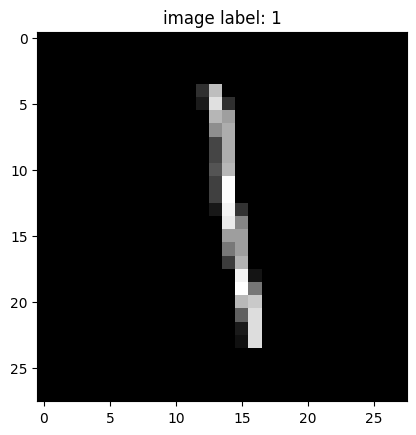

In [6]:
# choose a random image to display
from random import randint
index = randint(0, x_train.shape[0])
plt.imshow(x_train[index], cmap = 'gray')
plt.title("image label: {}".format(y_train[index]))
# adjust the figure size to be the same as the image
plt.rcParams['figure.figsize'] = (3,3)

## preprocess the dataset

In [7]:
# preprocess the data
x_train_normalized = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')/255
x_test_normalized = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')/255

# one-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# print the new shapes 
print("x_train_normalized shape: ", x_train_normalized.shape)
print("x_test_normalized shape: ", x_test_normalized.shape)
print("y_train_one_hot shape: ", y_train_one_hot.shape)
print("y_test_one_hot shape: ", y_test_one_hot.shape)


x_train_normalized shape:  (60000, 28, 28, 1)
x_test_normalized shape:  (10000, 28, 28, 1)
y_train_one_hot shape:  (60000, 10)
y_test_one_hot shape:  (10000, 10)


In [8]:
# create the model
model = Lenet5(input_shape = (28,28,1), num_classes = 10)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0     

In [9]:
# compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
# train the model
history = model.fit(x_train_normalized, y_train_one_hot, batch_size = 64, epochs = 5, validation_split = 0.2)

Epoch 1/5
750/750 [==============================] - 19s 22ms/step - loss: 0.2616 - accuracy: 0.9212 - val_loss: 0.1031 - val_accuracy: 0.9694
Epoch 2/5
750/750 [==============================] - 17s 23ms/step - loss: 0.0837 - accuracy: 0.9739 - val_loss: 0.0827 - val_accuracy: 0.9743
Epoch 3/5
750/750 [==============================] - 17s 23ms/step - loss: 0.0629 - accuracy: 0.9809 - val_loss: 0.0679 - val_accuracy: 0.9797
Epoch 4/5
750/750 [==============================] - 17s 22ms/step - loss: 0.0499 - accuracy: 0.9842 - val_loss: 0.0553 - val_accuracy: 0.9838
Epoch 5/5
750/750 [==============================] - 17s 22ms/step - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.0625 - val_accuracy: 0.9813


## evaluate the model

In [11]:
# plot the training and validation accuracy and loss at each epoch
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

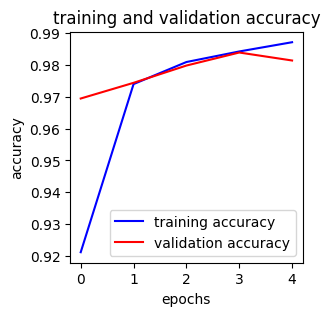

In [16]:
plt.plot(history_dict['accuracy'], c = 'b', label = 'training accuracy')
plt.plot(history_dict['val_accuracy'], c = 'r', label = 'validation accuracy')
plt.title("training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

Text(0.5, 1.0, 'training and validation loss')

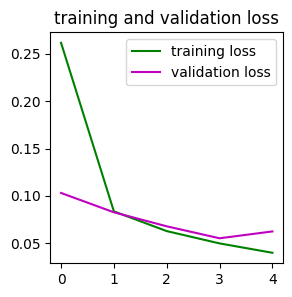

In [15]:
plt.plot(history_dict['loss'], c = 'g', label = 'training loss')
plt.plot(history_dict['val_loss'], c = 'm', label = 'validation loss')
plt.legend()
plt.title("training and validation loss")

In [17]:
model.evaluate(x_test_normalized, y_test_one_hot)

313/313 [==============================] - 3s 9ms/step - loss: 0.0489 - accuracy: 0.9841


[0.04887813702225685, 0.9840999841690063]

In [18]:
predictions = model.predict(x_test_normalized)

313/313 [==============================] - 2s 7ms/step


Text(0.5, 1.0, 'image label: 0, predicted label: 0')

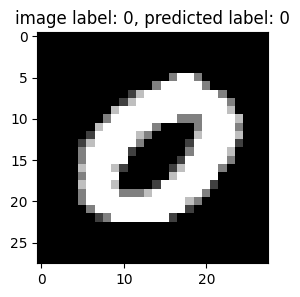

In [81]:
# visualize the model results
index = randint(0, x_test_normalized.shape[0])
plt.imshow(x_test[index], cmap = 'gray')
plt.title("image label: {}, predicted label: {}".format(y_test[index], predictions[index].argmax()))

In [48]:
predictions.argmax(axis = 1) == y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [56]:
dummy1 = np.array([1,2,3,4,5,6,7,8,9,10])
dummy2 = np.array([1,2,3,4,5,5,7,8,9,10])
np.where(dummy1 != dummy2)

(array([5], dtype=int64),)

Text(0.5, 1.0, 'image label: 9, predicted label: 7')

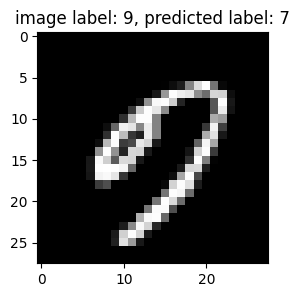

In [60]:
# get the misclassified images
import numpy as np
misclassified = np.where(predictions.argmax(axis = 1) != y_test)
# pick a random misclassified image
index = randint(0, misclassified[0].shape[0])
plt.imshow(x_test[misclassified[0][index]], cmap = 'gray')
plt.title("image label: {}, predicted label: {}".format(y_test[misclassified[0][index]], predictions[misclassified[0][index]].argmax()))